Function to go from cartesian coordinates with origin at galactic centre to cartesian with origin at Earth

In [315]:
import numpy as np

In [316]:
def gctoec(a):
    b=a.copy()
    b[0]=b[0]+8.5
    return b


Function to go from cartesian coordinates with origin at Earth to cartesian with origin at galactic centre

In [317]:
def ectogc(a):
    b=a.copy()
    b[0]=b[0]-8.5
    return b

Function to go from cylindrical coordinates $(r,\phi,z)$ to cartesian coordinates $(x,y,z)$

In [318]:
def cytoca(a):
    b=np.array([0.0,0.0,0.0])
    b[0]=(np.cos(a[1]))*a[0]
    b[1]=(np.sin(a[1]))*a[0]
    b[2]=a[2]
    return b

Function to go from cartesian coordinates $(x,y,z)$ to cylindrical coordinates $(r,\phi,z)$

In [319]:
def catocy(a):
    b=np.array([0.0,0.0,0.0])
    b[2]=a[2]
    b[0]=np.sqrt(a[0]**2+a[1]**2)
    if a[0]==0 and a[1]>0:
        b[1]=np.pi/2
    if a[0]==0 and a[1]<0:
        b[1]=3*np.pi/2
    if a[0]==0 and a[1]==0:
        b[1]=0
    if a[0]>0 and a[1]>=0:
        b[1]=np.arctan(a[1]/a[0])
    if a[0]>0 and a[1]<0:
        b[1]=2*np.pi+np.arctan(a[1]/a[0])
    if a[0]<0 :
         b[1]=np.pi+np.arctan(a[1]/a[0])
    return b
        

Function to take a vector field in cylindrical coordinates $f(r,\phi,z)\hat{r}+g(r,\phi,z)\hat{\phi}+h(r,\phi,z)\hat{z}$ and convert it to $ X(x,y,z) \hat{x} + Y(x,y,z) \hat{y}+Z(x,y,z) \hat{z}$

In [320]:
def vecfcytoca(a): # a is an array of functions f,g,h each of which return real numbers given an array. 
    def X(x):
        y=catocy(x)
        return   a[0](y)*np.cos(y[1])-a[1](y)*np.sin(y[1])
    def Y(x):
        y=catocy(x)
        return   a[0](y)*np.sin(y[1])+a[1](y)*np.cos(y[1])
    def Z(x):
        y=catocy(x)
        return a[2](y)
    return np.array([X,Y,Z])
    
        
        
 

Function to take a vector field in cartesian coordinates with origin at galactic centre and convert it to cartesian coordinates with origin at Earth (x= -8.5 kpc)
    
   

In [321]:
def cagctocae(a):
    def X(x):
        y=ectogc(x)
        return a[0](y)
    def Y(x):
        y=ectogc(x)
        return a[1](y)
    def Z(x):
        y=ectogc(x)
        return a[2](y)
    return np.array([X,Y,Z])
    
    

Function to take spherical polar coordinates $(r,\theta,\phi)$ to cartesian coordinates $(x,y,z)$

In [322]:
def sptoca(a):
    b=np.array([0.0,0.0,0.0])
    b[0]=np.sin(a[1])*np.cos(a[2])*a[0]
    b[1]=np.sin(a[1])*np.sin(a[2])*a[0]
    b[2]=np.cos(a[1])*a[0]
    return b

Function to take vector field in cartesian coordinates  $ X(x,y,z) \hat{x} + Y(x,y,z) \hat{y}+Z(x,y,z) \hat{z}$ to spherical polar coordinates $f(r,\theta,\phi)\hat{r}+g(r,\theta,\phi)\hat{\theta}+h(r,\theta,\phi)\hat{\phi}$

In [323]:
def vecfcatosp(a):
    def f(x):
        y=sptoca(x)
        return a[0](y)*np.sin(x[1])*np.cos(x[2])+a[1](y)*np.sin(x[1])*np.sin(x[2])+a[2](y)*np.cos(x[1])
    def g(x):
        y=sptoca(x)
        return a[0](y)*np.cos(x[1])*np.cos(x[2])+a[1](y)*np.cos(x[1])*np.sin(x[2])-a[2](y)*np.sin(x[1])
    def h(x):
        y=sptoca(x)
        return -1*a[0](y)*np.sin(x[2])+a[1](y)*np.cos(x[2])
    return np.array([f,g,h])

Function to take a scalar function from cylindrical to cartesian coordinates 

In [324]:
def scalfcytoca(a):
    def f(x):
        y=catocy(x)
        return a(y)
    return f

Function to take a scalar function from galaxy centre coordinates to earth centre coordinates

In [325]:
def scalfgctoec(a):
    def f(x):
        y=ectogc(x)
        return a(y)
    return f
        
    

Function to go from scalar function in cartesian coordinates to spherical coordinates 

In [326]:
def scalfcatosp(a):
    def f(x):
        y=sptoca(x)
        return a(y)
    return f

Function to identify which spiral region a point is in given cylindrical coordinates $(r,\phi,z)$

In [327]:
def regionfinder(a):
    r=a[0]
    phi=a[1]-np.pi
    alpha=np.deg2rad(11.5)
    radii=np.array([5.1,6.3,7.1,8.3,9.8,11.4,12.7,15.5])
    for n in range(-5,6):
        if radii[0]*np.exp(np.tan(alpha)*(phi+2*n*np.pi))<=r and radii[0]*np.exp(np.tan(alpha)*(phi+2*(n+1)*np.pi))>r:
            psi=phi+2*n*np.pi
            break
            
    if radii[1]*np.exp(psi*np.tan(alpha))>r:
        return 1
    elif radii[2]*np.exp(psi*np.tan(alpha))>r:
        return 2
    elif radii[3]*np.exp(psi*np.tan(alpha))>r:
        return 3
    elif radii[4]*np.exp(psi*np.tan(alpha))>r:
        return 4
    elif radii[5]*np.exp(psi*np.tan(alpha))>r:
        return 5
    elif radii[6]*np.exp(psi*np.tan(alpha))>r:
        return 6
    elif radii[7]*np.exp(psi*np.tan(alpha))>r:
        return 7
    else:
        return 8

    

Defining the radial component of the spiral magnetic field in cylindrical coordinates $f(r,\phi,z) \hat{r} $

In [328]:
def bspiralrad(a):
    r=a[0]
    phi=a[1]
    alpha=np.deg2rad(11.5)
    bstrengths=np.array([0.1,3.,-0.9,-0.8,-2.,-4.2,0.,2.7])
    i=regionfinder(a)-1
    return bstrengths[i]*5/r*np.sin(alpha) 

Defining the azimuthal component of the spiral magnetic field in cylindrical coordinates $g(r,\phi,z) \hat{\phi} $

In [329]:
def bspiralazi(a):
    r=a[0]
    phi=a[1]
    alpha=np.deg2rad(11.5)
    bstrengths=np.array([0.1,3.,-0.9,-0.8,-2.,-4.2,0.,2.7])
    i=regionfinder(a)-1
    return bstrengths[i]*5/r*np.cos(alpha) 

Defining the z-component of the spiral magnetic field $h(r,\phi,z) \hat{z} $

In [330]:
def bspiralzf(a): #f stands for final
    return 0

Defining the transition function $ L(z,h,w)= (1+e^{-2\frac{|z|-h}{w}})^{-1} $

In [331]:
def tran(z,h,w):
    return 1/(1+np.exp(-2*(abs(z)-h)/w))

Appending this to our disc field and adding the conditions r<3 , 3<r<5, 5<r<20 and r>20 conditions 

In [332]:
hdisc=0.40

In [333]:
wdisc=0.27

In [334]:
bring=0.1

In [335]:
def bspiralradf(a):
    if (a[0]<=5 or a[0]>=20):
        return 0
    else:
        return bspiralrad(a)*(1-tran(a[2],hdisc,wdisc))
    
    

In [336]:
def bspiralazif(a):
    if (a[0]<=3 or a[0]>=20):
        return 0
    elif (3<a[0]<=5):
        return bring*(1-tran(a[2],hdisc,wdisc))
    else:
        return bspiralazi(a)*(1-tran(a[2],hdisc,wdisc))
    
     

Note that we are now done with the disc field in cylindrical coordinates with the origin at the galactic centre:$ (bspiralradf, bsprialazif,bspiralzf) $

Now the halo field is purely azimuthal and also symmetric in $\phi $.Here are the involved parameters:

In [337]:
Bn = 1.4 
Bs = -1.1
rn = 9.22
rs =16.7
wh = 0.20 
z0 = 5.3 

In [338]:
def bhaloazi(a):
    
    if a[2]>=0:
        return tran(a[2],hdisc,wdisc)*np.exp(-abs(a[2])/z0)*Bn*(1-tran(a[0],rn,wh))
    elif a[2]<0:
        return tran(a[2],hdisc,wdisc)*np.exp(-abs(a[2])/z0)*Bs*(1-tran(a[0],rs,wh))
    

Finally the out of plane field has the following parametres:


In [339]:
BX = 4.6 
theta0 =np.deg2rad(49)
rcX = 4.8 
rX = 2.9 

In [340]:
def bx(r):
    return BX*np.exp(-r/rX)

In [341]:
def thetaX(a):
    if a[0]==0:
        return np.pi/2
    
    elif a[0]<rcX+abs(a[2])/np.tan(theta0):
        return np.arctan((np.tan(theta0)/a[0])*(rcX+abs(a[2])/np.tan(theta0)))
    else:
        return theta0
                         
   
                         
                        
                         
    

In [342]:
def rp(a):
    return (a[0]*rcX)/(rcX+abs(a[2])/np.tan(theta0))

In [343]:
def bXrad(a):
    if thetaX(a)>theta0:
        B=bx(rp(a))*(rp(a)/a[0])**2
        if a[2]>=0:
            return B*np.cos(thetaX(a))
        else:
            return -B*np.cos(thetaX(a))
        
    else:
        p=a[0]-abs(a[2])/np.tan(theta0)
        B=bx(p)*(p/a[0])
        if a[2]>=0:
            return B*np.cos(theta0)
        else:
            return -B*np.cos(theta0)
        
    

In [344]:
def bXz(a):
    if thetaX(a)>theta0:
        B=bx(rp(a))*(rp(a)/a[0])**2
        return B*np.sin(thetaX(a))
    else:
        p=a[0]-abs(a[2])/np.tan(theta0)
        B=bx(p)*(p/a[0])
        return B*np.sin(theta0)
    

Now we construct the different components of the total magnetic field and set it to 0 in a 1kpc sphere around the galactic centre and also to 0 outside r>20 kpc

In [345]:
def bradtotal(a):
    if a[0]**2+a[2]**2<=1 or a[0]>20 :
        return 0
    else: 
        return bspiralradf(a)+bXrad(a)

In [346]:
def bazitotal(a):
    if a[0]**2+a[2]**2<=1 or a[0]>20:
        return 0
    else:
        return bspiralazif(a)+bhaloazi(a)

In [347]:
def bztotal(a):
    if a[0]**2+a[2]**2<=1 or a[0]>20:
        return 0
    else:
        return bXz(a)

Now we construct the total vector field array $(f,g,h)$ where the magnetic field in cylindrical coordinates with origin at the galactic center is $f(r,\phi,z)\hat{r}+g(r,\phi,z)\hat{\phi}+h(r,\phi,z)\hat{z}$

In [348]:
bmag=np.array([bradtotal,bazitotal,bztotal])

To get this to spherical coordinates with the origin at the Earth, we first convert it to cartesian coordinates with origin at GC, then cartesian coordinates with origin at Earth, and then spherical with origin at Earth using the functions created above.

In [349]:
bmagfinal= vecfcatosp(cagctocae(vecfcytoca(bmag)))

Now if $\vec{B}=f(r,\theta,\phi)\hat{r}+g(r,\theta,\phi)\hat{\theta}+h(r,\theta,\phi)\hat{\phi}$ in spherical coordinates centred at Earth then $ bmagfinal[0]=f,  bmagfinal[1]=g, bmagfinal[2]=h $ and we are done with the magnetic field

Next we try to to reproduce fig.1 from https://arxiv.org/pdf/1404.7741.pdf by calculating the average transverse magnetic field along a line starting at 20kpc from Earth at different $(\theta,\phi)$ 

In [350]:
def bmagrad(r,theta,phi):
    x=np.array([r,theta,phi],dtype=float)
    return bmagfinal[0](x)

In [351]:
def bmagtheta(r,theta,phi):
    x=np.array([r,theta,phi],dtype=float)
    return bmagfinal[1](x)

In [352]:
def bmagphi(r,theta,phi):
    x=np.array([r,theta,phi],dtype=float)
    return bmagfinal[2](x)

In [353]:
def bperp(r,theta,phi):
    return np.sqrt(bmagphi(r,theta,phi)**2+bmagtheta(r,theta,phi)**2)

In [354]:
from scipy.integrate import quad

In [355]:
def bavg(theta:float,phi:float)-> float:
    def bperpint(r):
        return 0.05*bperp(r,theta,phi)
    return quad(bperpint,0,20)[0]

In [356]:
x=np.arange(-np.pi,np.pi,np.pi/100)

In [357]:
y=np.arange(-np.pi/2,np.pi/2,np.pi/100)

In [358]:
bavgarr=np.zeros((100,200))

In [359]:
#for i in range(100):
  #  for j in range(200):
     #   if x[j]>=0:
     #       phi=x[j]
     #   else:
      #      phi=2*np.pi+x[j]
      #  theta=np.pi/2-y[i]
      #  bavgarr[i][j]=bavg(theta,phi)

In [360]:
#import matplotlib.pyplot as plt

In [361]:
#X,Y=np.meshgrid(x,y)

In [362]:
#plt.contourf(X,Y,bavgarr,cmap='inferno',levels=200)
#plt.colorbar()

The above code takes some time to run so I have attached a picture of the resulting plot
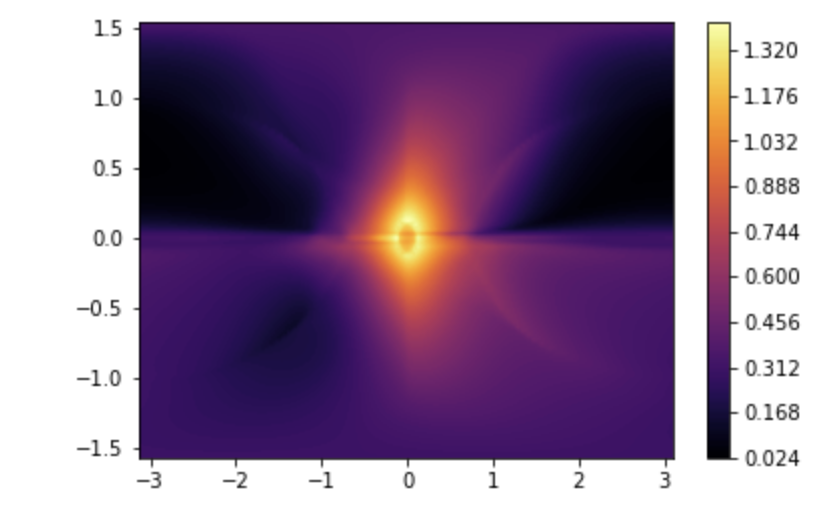

This seems to at least kind of match:






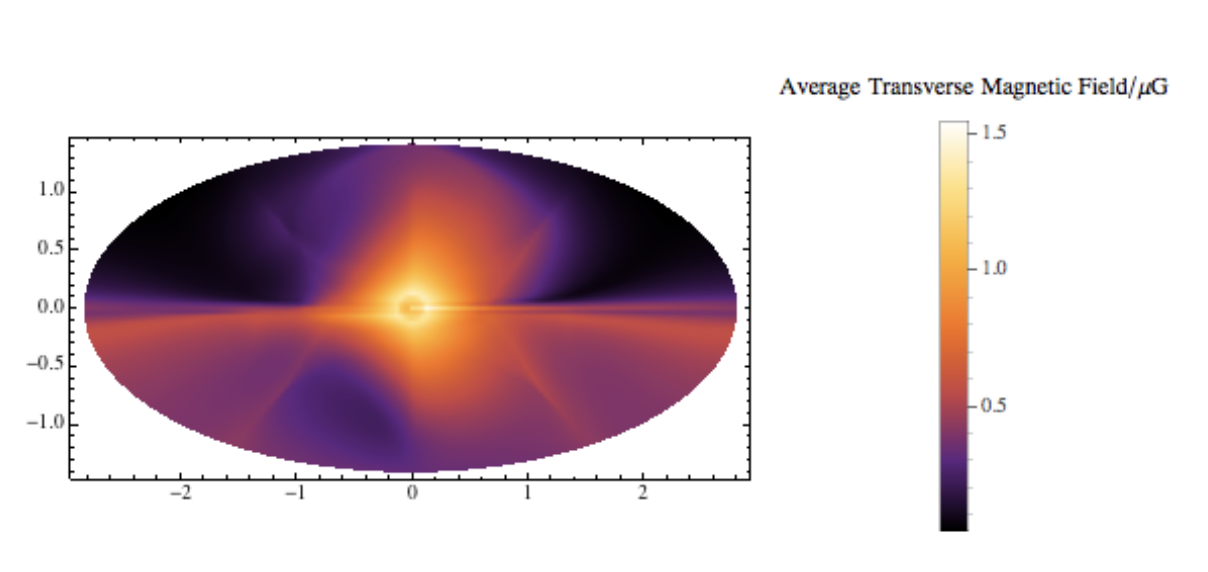


Is this enough to be convinced that I have got the magnetic field model right? How can I fix the problems with the integrals that it is showing? Most of the inconsistency seems to be in the direction away from the galactic centre at negative latitudes. Our plot is underestimating the average field in these directions.

Anyhow we now proceed with definining the free electron density model 

In [363]:
Ro=8.5 
hthick= 1.1

In [364]:
def nthick(a):
    return 1.77*10**(-2)*(np.cosh(Ro/15.4))**2/(np.cosh(a[0]/15.4))**2*1/(np.cosh(a[2]/hthick))**2

In [365]:
def nthin(a):
    return 1.07*10**(-2)*(np.cosh(Ro/3.6))**2/(np.cosh(a[0]/3.6))**2*1/(np.cosh(a[2]/0.04))**2

In [366]:
def ne(a):
    if nthin(a)+nthick(a)>10**(-7):
        return nthick(a)+nthin(a)
    else:
        return 10**(-7)


Now ne(a) is in cylindrical coordinates with origin at the galactic centre so we succesively apply scalfcytoca ,scalfgctoec, and scalfcatosp to get it in spherical coordinates with the origin at the earth

In [367]:
nefinal=scalfcatosp(scalfgctoec(scalfcytoca(ne)))

Now we come to the hydrogen density and repeat the same process pretty much

In [368]:
def nHI(a):
    if a[0]>=2.75:
        return 0.32*np.exp(-a[0]/18.24-abs(a[2])/0.52)
    else:
        return 0

In [369]:
def nH2(a):
    return 4.06*np.exp(-a[0]/2.57-abs(a[2])/0.08)

In [370]:
def nH(a):
    return 2*nH2(a)+nHI(a)

In [371]:
nHfinal=scalfcatosp(scalfgctoec(scalfcytoca(nH)))

In [372]:
def nevar(r,theta,phi):
    a=np.array([r,theta,phi])
    return nefinal(a)

In [373]:
def nHvar(r,theta,phi):
    a=np.array([r,theta,phi])
    return nHfinal(a)

Hence $nHvar(r,\theta,\phi)$ is the total hydrogen atom density and  $nevar(r,\theta,\phi) $ is the free electron density in spherical coordinates with center at Earth as we desired

We must now find the effective interstellar photoelectric absorption cross-section $\sigma_{eff}$ as in https://adsabs.harvard.edu/full/1983ApJ...270..119M

In [374]:
c0=352.2 
c1=18.7
E=3.55

In [375]:
sigma=(c0+c1*E)/(E**3)*10**(-24)

In [376]:
def taoSI(r,theta,phi):
    return sigma*nHvar(r,theta,phi)


In [377]:
from astropy import constants as const

We now define some more parameters

In [378]:
e=4.8032*10**(-10)
hbar=1.0546*10**(-27)
me=9.1094*10**(-28)
c=2.99792458*10**(10)


In [379]:
w=E*10**(3)*1.6022*10**(-12)

In [380]:
def wpl(r,theta,phi):
    return np.sqrt(nevar(r,theta,phi))*5.64*10**(4)*hbar

In [381]:
ma=0

In [382]:
deltaa=-ma**2/w

In [383]:
def deltag(r,theta,phi):
    return -wpl(r,theta,phi)**2/(2*w*hbar*c)

In [384]:
M=10**(13)*10**(9)*1.6022*10**(-12) #we set the coupling constant here

In [385]:
def deltax(r,theta,phi):
    return -bmagtheta(r,theta,phi)*10**(-6)*np.sqrt(hbar*c)/(2*M) #Bx is -ve of Btheta and 1 uG=10^(-10) T

In [386]:
def deltay(r,theta,phi):
    return bmagphi(r,theta,phi)*10**(-6)*np.sqrt(hbar*c)/(2*M) #By is Bphi

In [387]:
def deltaF(r,theta,phi):
    return 0

In [436]:
def Hmat(r,theta,phi):
    a=np.array([[deltag(r,theta,phi),deltaF(r,theta,phi),deltax(r,theta,phi)],[deltaF(r,theta,phi),deltag(r,theta,phi),deltay(r,theta,phi)],[deltax(r,theta,phi),deltay(r,theta,phi),deltaa]])
    b=np.array([[1j*taoSI(r,theta,phi)/2,0,0],[0,1j*taoSI(r,theta,phi)/2,0],[0,0,0]])
    return a-b
    
    

In [437]:
import scipy as sci

In [480]:
def P(r,theta,phi):
    x=np.linspace(0,r,100)
    delz=(x[1]-x[0])*3.086*10**(21)
    pmat=np.array([[0,0,0],[0,0,0],[0,0,1]])
    for i in range(98,-1,-1):
        pmat=sci.linalg.expm(-1j*delz*Hmat(x[i],theta,phi))@pmat@sci.linalg.expm(1j*delz*np.conj(Hmat(x[i],theta,phi)).T)
    P=np.real(pmat[1][1]+pmat[0,0])
    return P
        

Now we try to reproduce figure 2: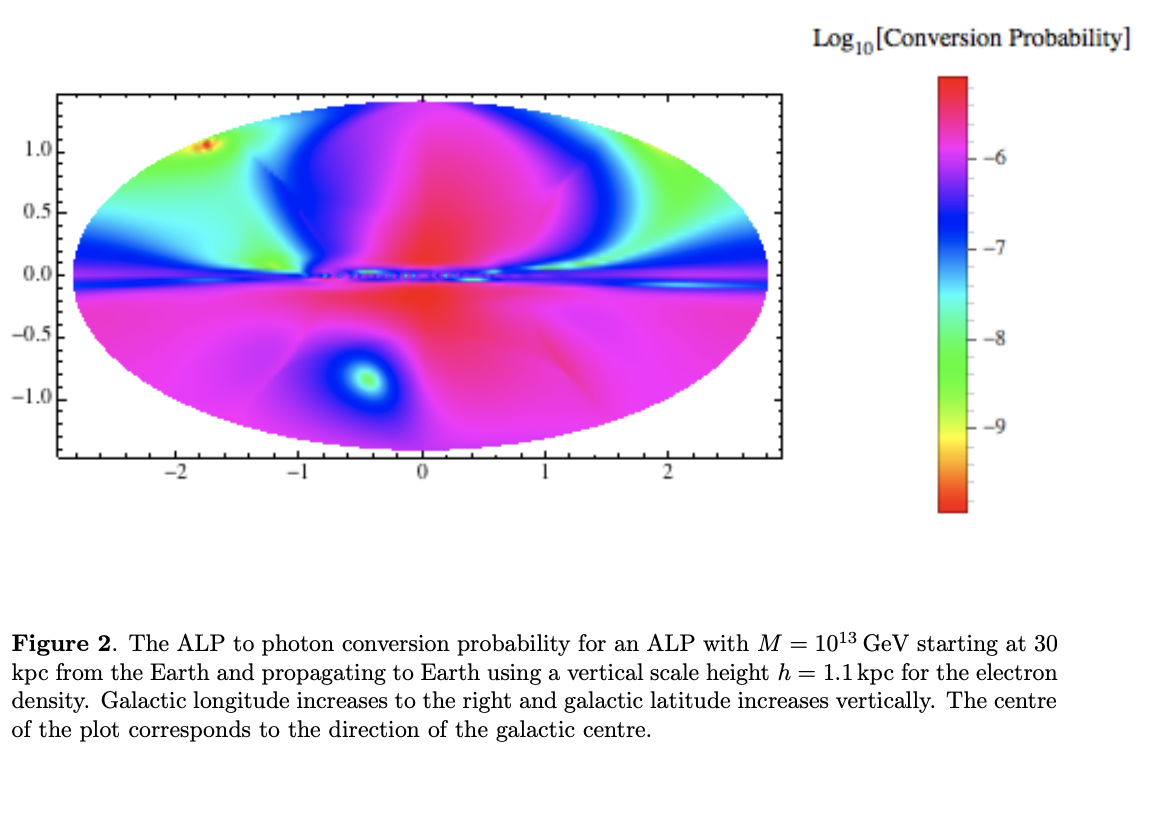

In [481]:
x1=np.arange(-np.pi,np.pi,4*np.pi/100)

In [482]:
y1=np.arange(-np.pi/2,np.pi/2,4*np.pi/100)

In [483]:
p30arr=np.zeros((25,50))

In [484]:
for i in range(25):
    for j in range(50):
        if x1[j]>=0:
            phi=x1[j]
        else:
            phi=2*np.pi+x1[j]
        theta=np.pi/2-y1[i]
        p30arr[i][j]=np.log10(P(30,theta,phi))

/var/folders/2g/rfddqxpd70l_bwhpsfnbknvr0000gn/T/ipykernel_6541/739727340.py:2: RuntimeWarning: overflow encountered in cosh
  return 1.07*10**(-2)*(np.cosh(Ro/3.6))**2/(np.cosh(a[0]/3.6))**2*1/(np.cosh(a[2]/0.04))**2
/var/folders/2g/rfddqxpd70l_bwhpsfnbknvr0000gn/T/ipykernel_6541/739727340.py:2: RuntimeWarning: overflow encountered in double_scalars
  return 1.07*10**(-2)*(np.cosh(Ro/3.6))**2/(np.cosh(a[0]/3.6))**2*1/(np.cosh(a[2]/0.04))**2


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
X1,Y1=np.meshgrid(x1,y1)

In [ ]:
plt.contourf(X1,Y1,p30arr,cmap='hsv',levels=200)
plt.colorbar()

Here is a picture of the plot since the code takes a while to run:
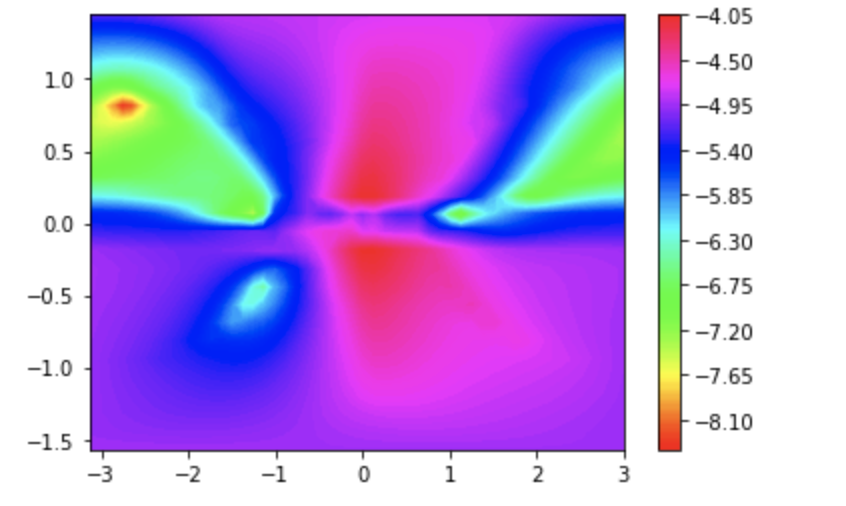
This plot shows logarithm of the probability of axion to photon conversion for axions produced 30kpc away from earth. Just like figure 2. I think it is consistent enough. All the features are present, although probability is slightly overestimated at negative lattitudes in the direction away from the galactic centre (the average transverse magnetic field in this direction was too, so that at least adds up). Also the low probability 'hole' (green and blue patch in the middle of pink) in the direction  slightly right and under  the galactic centre (as seen from Earth) is displaced further right and up. This inconsistency was seen when we reproduced fig. 1 as well ( showing averange transverse field). 2 possible improvements we can make are increasing the number of domains in the iterative calculation of the density matrix (it is at a 1000 right now) and increasing the number of gridpoints involved in the formation of the contour plot (right now it is 50 $\times$ 25= 1250). Right now there is a factor of 10 off somewhere. Our plot is giving 10 times the actual probability. Where have I made a mistake with the units? Or maybe the plot in the paper is incorrect. I had actually noticed a mistake on page 3 of the paper where they computed the numerical factor in front of the approximate probability of conversion as $2.3 \times 10^{-8}$ whereas my calculation gave $ \approx 3*10^{-7} $ again showing that the paper underestimated by a factor of 10. Please check this out.

Anyhow we now proceed with computing the expected flux in any direction. First we define the dark matter density profile:

In [502]:
def pdmatter(a): #cylindrical coordinates with origin at galactic centre
    r=np.sqrt(a[0]**2+a[2]**2)
    rs=20
    Ro=8.5
    ps=0.4*10**(6)*(Ro/rs)*(1+(Ro/rs))**2 # units of keV/cm^3
    return ps/((r/rs)*(1+(r/rs))**2)

In [503]:
0.4*10**(6)*(8.5/20)*(1+(8.5/20))**2

345206.25

In [504]:
pdmattersph=scalfcatosp(scalfgctoec(scalfcytoca(pdmatter))) #converting to spherical coordinates with origin at the earth

In [505]:
def pdmatterf(r,theta,phi):
    return pdmattersph([r,theta,phi])

In [506]:
Meff=M/(10**(13)*10**(9)*1.6022*10**(-12))

In [507]:
mdm=7.1

In [508]:
tao=5*10**(24)/(Meff)**2/(mdm/7.1)

In [525]:
def columndensity(theta,phi):
    def columndensityint(r):
        return pdmatterf(r,theta,phi)*P(r,theta,phi)
    def pdmatterint(r):
        return pdmatterf(r,theta,phi)
    x=np.arange(0,30,0.25)
    zint=np.zeros(120)
    for i in range (0,120):
        zint[i]=columndensityint(x[i])
    cdupto30=np.sum(zint)*(x[1]-x[0])
    cdafter30=P(30,theta,phi)*quad(pdmatterint,30,np.inf)[0]
    return (cdupto30+cdafter30)*3.086*10**(21)

In [526]:
def flux(theta,phi):
    return 1/(4*np.pi*tao*mdm)*columndensity(theta,phi)

In [527]:
x2=np.arange(-np.pi,np.pi,np.pi/20)

In [528]:
y2=np.arange(-np.pi/2,np.pi/2,np.pi/20)

In [529]:
fluxarr=np.zeros((20,40))

In [530]:
for i in range(20):
    for j in range(40):
        if x2[j]>=0:
            phi=x2[j]
        else:
            phi=2*np.pi+x2[j]
        theta=np.pi/2-y2[i]
        fluxarr[i][j]=np.log10(flux(theta,phi))

/var/folders/2g/rfddqxpd70l_bwhpsfnbknvr0000gn/T/ipykernel_6541/739727340.py:2: RuntimeWarning: overflow encountered in double_scalars
  return 1.07*10**(-2)*(np.cosh(Ro/3.6))**2/(np.cosh(a[0]/3.6))**2*1/(np.cosh(a[2]/0.04))**2
/var/folders/2g/rfddqxpd70l_bwhpsfnbknvr0000gn/T/ipykernel_6541/739727340.py:2: RuntimeWarning: overflow encountered in cosh
  return 1.07*10**(-2)*(np.cosh(Ro/3.6))**2/(np.cosh(a[0]/3.6))**2*1/(np.cosh(a[2]/0.04))**2


In [531]:
X2,Y2=np.meshgrid(x2,y2)

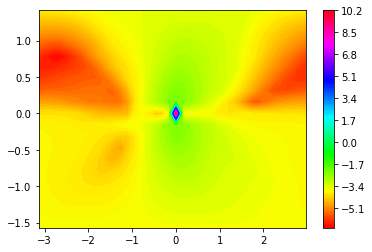

In [532]:
plt.contourf(X2,Y2,fluxarr,cmap='hsv',levels=200)
plt.colorbar()

## 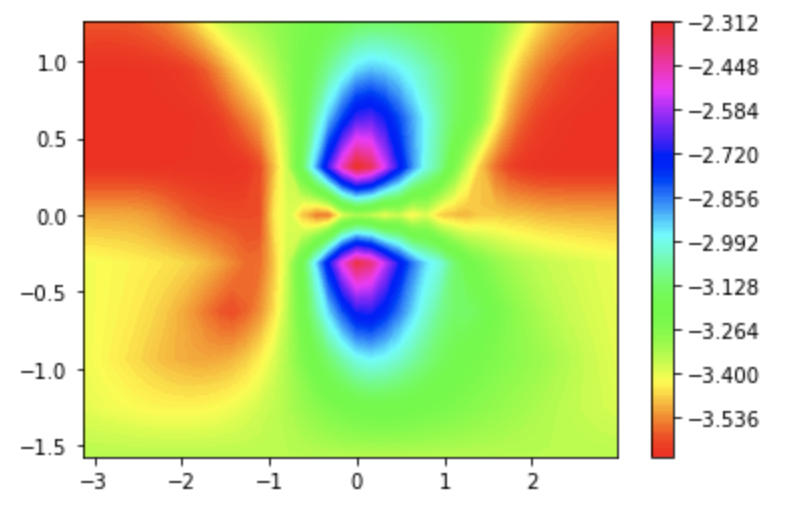

This does not really seem to match fig.3 like it should. 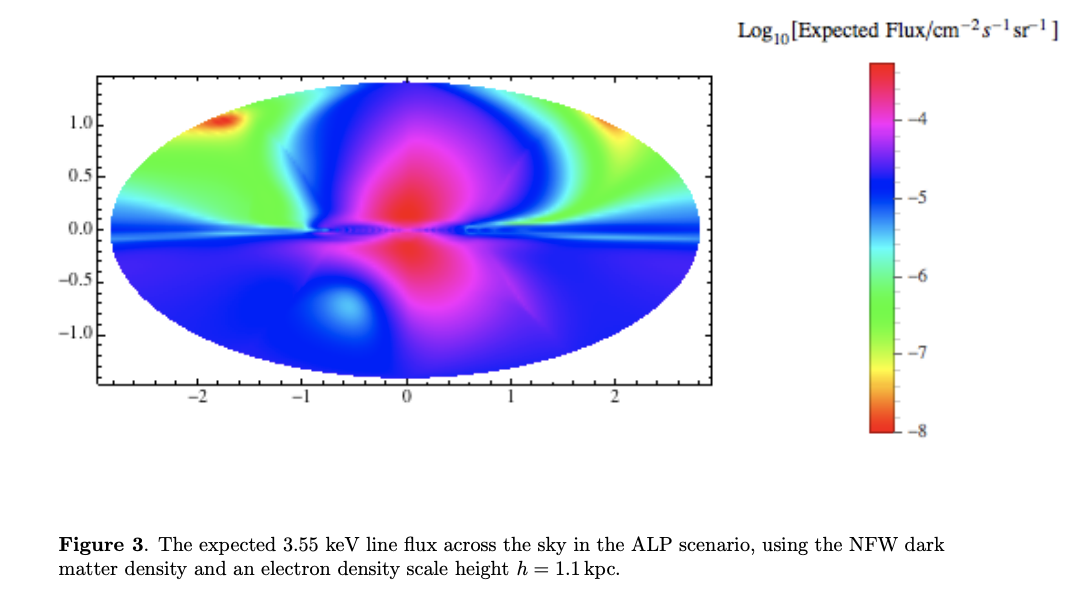
The features are somewhat correct but the values are completely off (more than by a factor of 10 which we expect because of our probability function). I do not see any logical error. I can try making the mesh finer in the plot (it is only at 200 points as of now). I had also noticed that the computations were taking too long and hence I decreased the number of domains in the probability calculation further to 250 from 1000. I can try increasing this back but I do not thing this is the issue. The lowest flux I was able to obtain even with 1000 domains (by seeing what the function is at a bunch of arbitrary points where I expected it to be small) was $10^{-4}$. Also the mesh size does not affect the numerical values. So what can the problem be?

Here is the correct plot (I had not been taking the integral as a sum correctly earlier). The values it predicts are generally correct but the features are not clear. I thought the mesh size was enough (20*40) but it does not seem to work. Should I increase it and try again?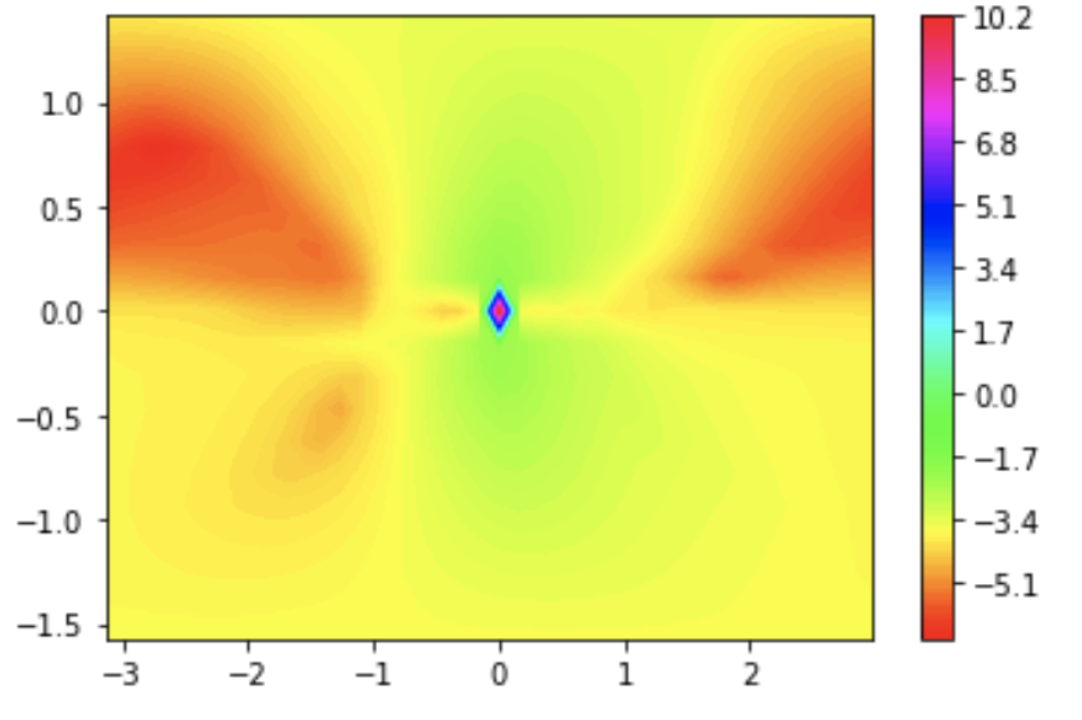

In [517]:
flux(1.07,0)

/var/folders/2g/rfddqxpd70l_bwhpsfnbknvr0000gn/T/ipykernel_6541/739727340.py:2: RuntimeWarning: overflow encountered in double_scalars
  return 1.07*10**(-2)*(np.cosh(Ro/3.6))**2/(np.cosh(a[0]/3.6))**2*1/(np.cosh(a[2]/0.04))**2


0.002603264524411979

In [519]:
flux(1.07,1)

/var/folders/2g/rfddqxpd70l_bwhpsfnbknvr0000gn/T/ipykernel_6541/739727340.py:2: RuntimeWarning: overflow encountered in double_scalars
  return 1.07*10**(-2)*(np.cosh(Ro/3.6))**2/(np.cosh(a[0]/3.6))**2*1/(np.cosh(a[2]/0.04))**2


0.0005947960062310905

In [520]:
flux(np.pi/2,0)

13629487435.804699

In [522]:
flux(0.3,0)

/var/folders/2g/rfddqxpd70l_bwhpsfnbknvr0000gn/T/ipykernel_6541/739727340.py:2: RuntimeWarning: overflow encountered in double_scalars
  return 1.07*10**(-2)*(np.cosh(Ro/3.6))**2/(np.cosh(a[0]/3.6))**2*1/(np.cosh(a[2]/0.04))**2


0.00047446732106786783

In [524]:
flux(1.07,3)

/var/folders/2g/rfddqxpd70l_bwhpsfnbknvr0000gn/T/ipykernel_6541/739727340.py:2: RuntimeWarning: overflow encountered in double_scalars
  return 1.07*10**(-2)*(np.cosh(Ro/3.6))**2/(np.cosh(a[0]/3.6))**2*1/(np.cosh(a[2]/0.04))**2


8.941873455912828e-07

In [533]:
flux(np.pi/2,1)

0.000122636334595044

In [534]:
flux(1.07,0)

/var/folders/2g/rfddqxpd70l_bwhpsfnbknvr0000gn/T/ipykernel_6541/739727340.py:2: RuntimeWarning: overflow encountered in double_scalars
  return 1.07*10**(-2)*(np.cosh(Ro/3.6))**2/(np.cosh(a[0]/3.6))**2*1/(np.cosh(a[2]/0.04))**2


0.002603264524411979